In [24]:
#import dependencies
import qiskit
import qiskit_machine_learning
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,QuantumRegister
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier,VQC
from qiskit.utils import algorithm_globals as alg
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap,RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
import seaborn as sns


In [25]:
# Setting a random seed 
alg.random_seed = 101

In [26]:
inputs = 2
samples = 20
X = 2*alg.random.random([samples,inputs])-1
y0 = 1*(np.sum(X,axis=1)>=0)

In [27]:
X.shape

(20, 2)

In [28]:
y0

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [29]:
y = 2*y0-1

In [30]:
y # This returns a value between -1 and 1,it will come in handy later on

array([ 1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1])

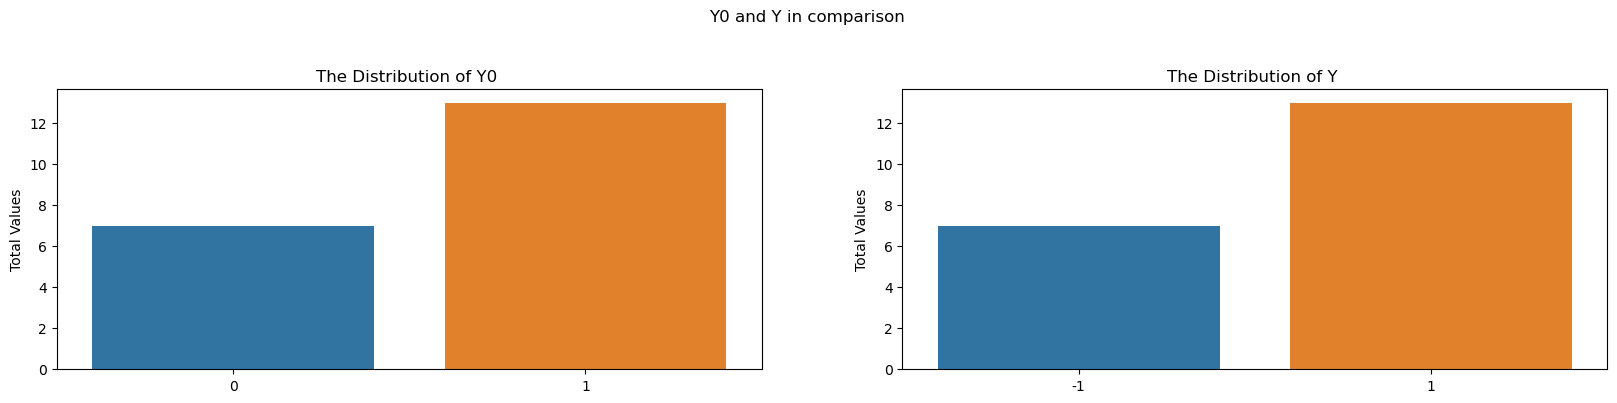

In [31]:
# I have to investigate  if this changes the number of classes,does the balance shift?
fig = plt.figure(figsize=(20,8))
fig.suptitle("Y0 and Y in comparison")
plt.subplot(2,2,1)
sns.countplot(x=y0)
plt.ylabel("Total Values")
plt.title("The Distribution of Y0 ")
plt.subplot(2,2,2)
sns.countplot(x=y)
plt.ylabel("Total Values")
plt.title("The Distribution of Y ")
plt.show() # It is worth noting that both "data" is evenly distributed interms of *classes*

In [32]:
# We can one hot encode the y _values
y_encode = np.zeros((samples,2))
for i in range(samples):
    y_encode[i,y0[i]]=1

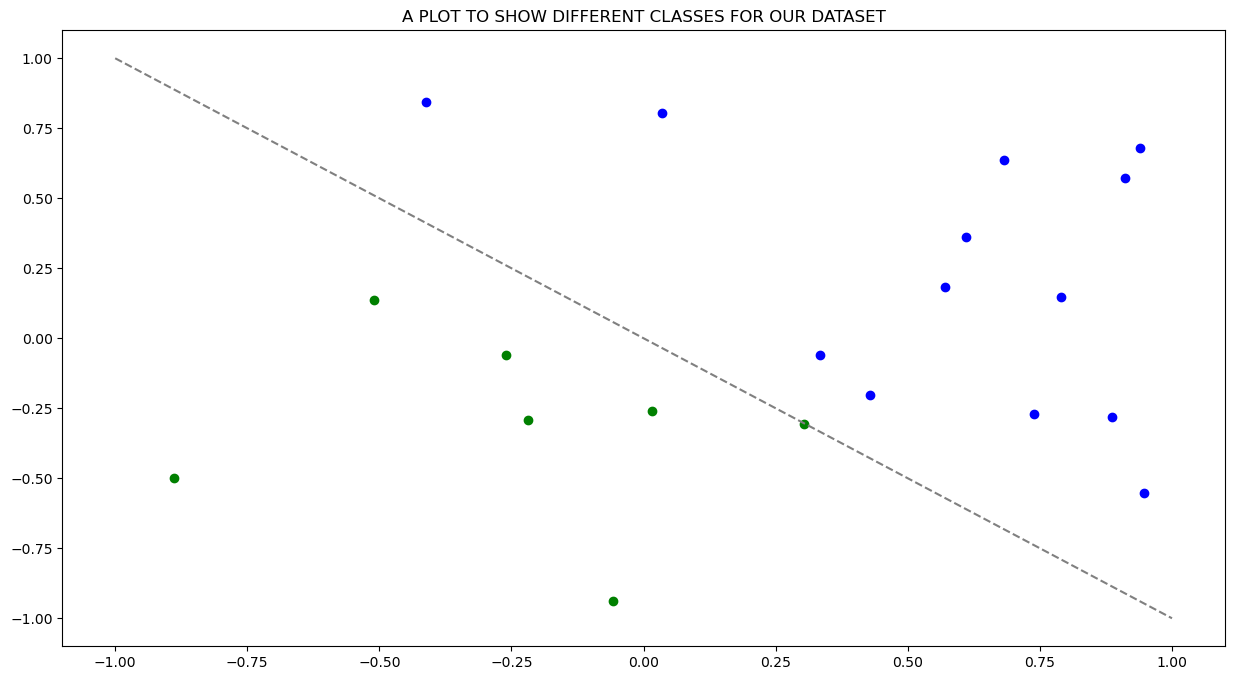

In [33]:
# Plotting the various classes and their labels
plt.figure(figsize=(15,8))
for x,y_target in zip(X,y):
    if y_target == 1:
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
plt.plot([-1,1],[1,-1],"--",color='grey')
plt.title("A PLOT TO SHOW DIFFERENT CLASSES FOR OUR DATASET")
plt.show()

# QUANTUM NEURAL NETWORK CLASSIFICATION USING ESTIMATOR QNN

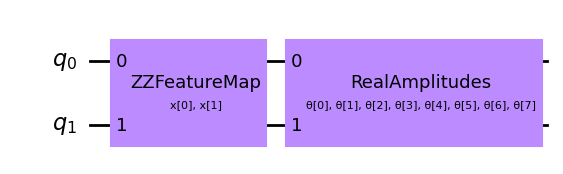

In [11]:
#create a circuit
qc = QuantumCircuit(2)
features = ZZFeatureMap(2)
ansatz = RealAmplitudes(2)
qc.compose(features,inplace=True)
qc.compose(ansatz,inplace=True)
qc.draw("mpl") # To display our circuit

In [12]:
# Instantiate the EstimatorQNN
e_qnn = EstimatorQNN(circuit=qc,input_params = features.parameters,weight_params=ansatz.parameters)

In [13]:
# Do a forward pass
# A forward pass would return some predictions
alg.random_seed = 101 # For reproducibality purposes
e_qnn_forward = e_qnn.forward(X[0,:],alg.random.random(e_qnn.num_weights))
print(f"The Result for our Forward Pass are {e_qnn_forward} and the shape is {e_qnn_forward.shape}")

The Result for our Forward Pass are [[0.28950337]] and the shape is (1, 1)


#  NEURAL NETWORK CLASSIFIER

In [14]:
e_classifier = NeuralNetworkClassifier(e_qnn,optimizer=COBYLA(maxiter=60))
e_classifier

In [15]:
X.shape


(20, 2)

In [16]:
e_classifier.fit(X,y)

In [17]:
e_classifier.score(X,y)

0.6

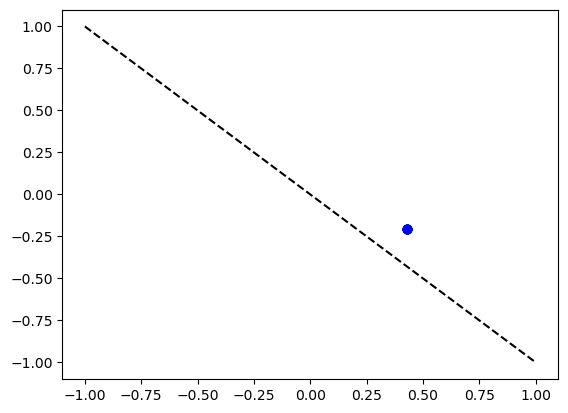

In [34]:
# Evaluating our data points
y_predict = e_classifier.predict(X)
for X, y_targ,y_pred in zip(X,y,y_predict):
    if y_targ ==1:
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
    if y_targ != y_pred:
        plt.scatter(x[0],x[1])
plt.plot([-1,1],[1,-1],"--",color='black')
plt.show()

# REFERENCES
https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html